In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import ConvexHull
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Using TensorFlow backend.


In [2]:
df = pd.read_csv("working_csv.csv")
cols = df.columns
col_list = ["P. Habitable Class","P. Teq Max (K)","S. Mag from Planet","P. SFlux Mean (EU)","S. Teff (K)","P. Mag","P. HZD","P. ESI","P. SPH","P. HZC","P. Gravity (EU)","S. Size from Planet (deg)","S. [Fe/H]","S. DEC (deg)","P. SFlux Min (EU)","S. Hab Zone Max (AU)","P. HZI","P. Eccentricity","P. Appar Size (deg)"]
for words in cols:
    if words not in col_list:
        df.drop(columns = [words] , inplace = True)

In [3]:
df = df.sample(frac=1)
x = df[["P. Teq Max (K)" , "S. Mag from Planet"]]
dataset = df.values

In [4]:
x = x.values
new_y = dataset[:,0]

y = list()
for values in new_y:
    if values == "mesoplanet":
        y.append(1)
    else:
        y.append(0)
        
y = np.asarray(y)

In [5]:
sc= StandardScaler()
x = sc.fit_transform(x)

In [6]:
perceptron = Perceptron(random_state = 0)
perceptron.fit(x, y)
predicted = perceptron.predict(x)

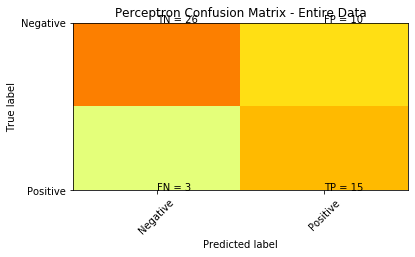

In [7]:
cm = confusion_matrix(y, predicted)
 
plt.clf() 
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Perceptron Confusion Matrix - Entire Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
  
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


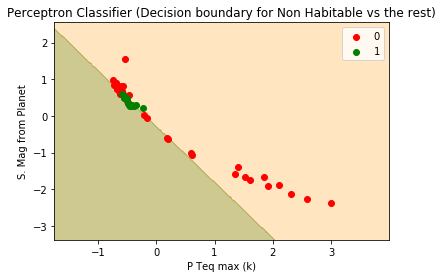

In [8]:
plt.clf()
X_set, y_set = x, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, perceptron.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('navajowhite', 'darkkhaki')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Perceptron Classifier (Decision boundary for Non Habitable vs the rest)')
plt.xlabel('P Teq max (k)')
plt.ylabel('S. Mag from Planet')
plt.legend()
plt.show()